<a href="https://www.kaggle.com/code/lakshmipriya190803/classification-using-ml-and-dl?scriptVersionId=158180305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### Importing Necessary Libraries

In [1]:
!nvidia-smi

Mon Jan  8 14:47:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exploratory Data Analysis

Lets explore the data to find out the patterns lying in the data

Our goal is to correctly classify whether a person has "Exited" or "Not Exited"

In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
print("Lets see whether the dataset contains NaN values or not: ")
df.isnull().sum()

Lets see whether the dataset contains NaN values or not: 


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Lets drop the CustomerId , id, and Surname since they are of no use

In [6]:
#X = df.drop(df['id', 'CustomerId', 'Surname'])
X = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Encode Categorical data : Geography and Gender

In [7]:
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
y = X['Exited']
X = X.drop(['Exited'], axis = 1)

In [9]:
col = df['Exited'].to_numpy()
classes, class_counts = np.unique(col , return_counts = True)
classes, class_counts

(array([0, 1]), array([130113,  34921]))

### Exploring the distributions and making necessary changes

#### Class Distribution : 

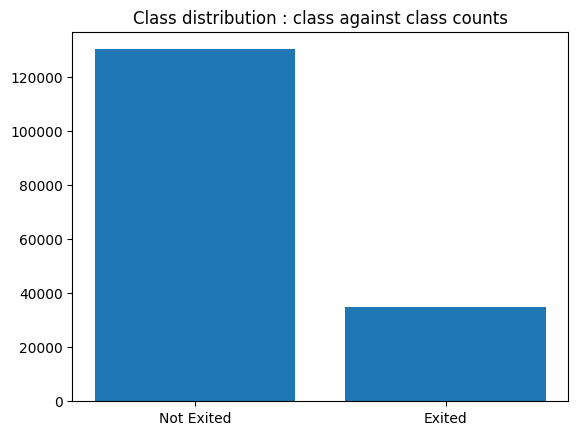

In [10]:
plt.title("Class distribution : class against class counts")
plt.bar(classes, class_counts)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

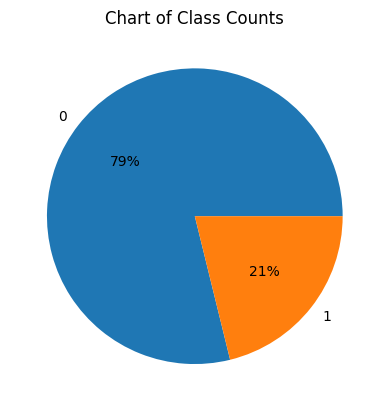

In [11]:
plt.title("Chart of Class Counts")
plt.pie(class_counts, labels = classes, autopct = '%1.0f%%')
plt.show()

##### Classes are imbalanced

The class imbalance is relatively high. Class 1: Exited only forms 21% of the training data.

I am going to use the following methods to create different datasets that are balanced and then perform machine learning on both, whichever gives higher precision and recall, will be chosen.

1. Undersampling
2. Oversampling (SMOTE)

#### Undersampling

Undersampling is a technique used to address class imbalance by reducing the number of samples in the majority class to create a more balanced dataset. The idea is to randomly select a subset of the majority class samples so that the ratio between the minority and majority classes becomes more balanced.

Since we know that class 0 has high amount of samples forming the majority class, we will randomly select a subset of samples from this for removal.

In [12]:
rus = RandomUnderSampler(random_state = 42)
X_undersampled , y_undersampled = rus.fit_resample(X, y)

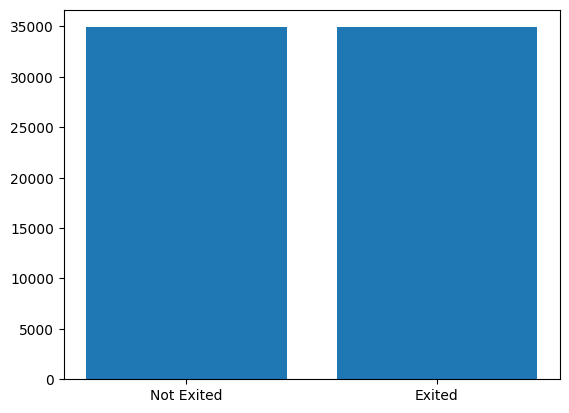

In [13]:
classes_under, class_counts_under = np.unique(y_undersampled.to_numpy(), return_counts = True)
plt.bar(classes_under, class_counts_under)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

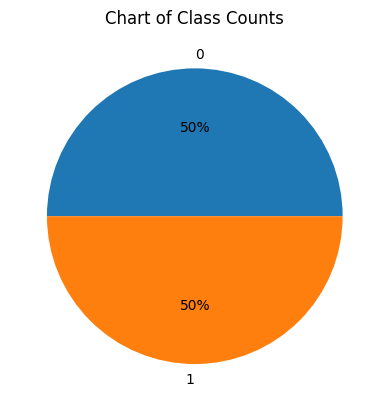

In [14]:
plt.title("Chart of Class Counts")
plt.pie(class_counts_under, labels = classes_under, autopct = '%1.0f%%')
plt.show()

#### Oversampling (SMOTE)

SMOTE = Synthetic Minority Over-sampling Technique

SMOTE generates synthetic samples for the minority class by interpolating new points between existing ones. For each sample in the minority class, it selects k nearest neighbors from the same class. It then selects one of these k neighbors at random and computes the difference between the feature vector of the original sample and the selected neighbor. It multiplies this difference by a random number between 0 and 1 and adds it to the feature vector of the original sample.

When we use Smote we do not lose information since this method does not remove any sample. It reduces the risk of overfitting because it generates synthetic samples that are not identical to the original samples.

On the other hand, SMOTE generates synthetic samples, which can introduce noise and outliers in the data. If the dataset is large, then applying SMOTE can be costly.

SMOTE is particularly useful when the class imbalance is severe and the minority class is significantly underrepresented. It is also useful when there is limited data available for the minority class, as it can create additional synthetic samples to improve model performance.

So in our case,

* class 1 is the minority class in the dataset, 
* we will be randomly select one sample
* for that selected sample we will identify nearest neighbours
* create synthetic samples by selecting random points along the line segments connecting the chosen sample with its nearest neighbours
* add the synthetic samples to minority class

In [15]:
sm = SMOTE(random_state = 42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

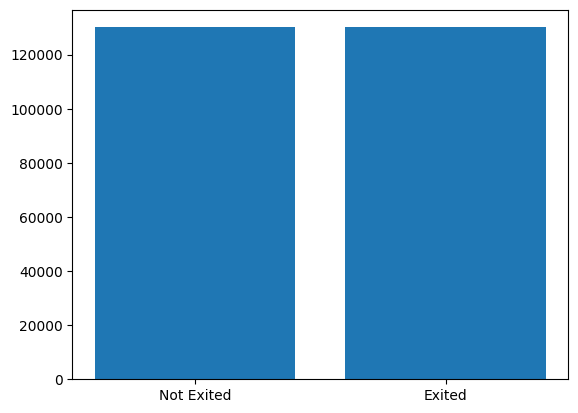

In [16]:
classes_over, class_counts_over = np.unique(y_SMOTE.to_numpy(), return_counts = True)
plt.bar(classes_over, class_counts_over)
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.show()

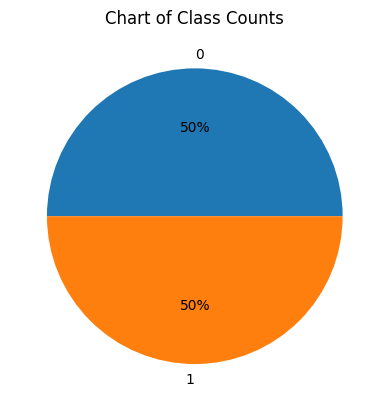

In [17]:
plt.title("Chart of Class Counts")
plt.pie(class_counts_over, labels = classes_over, autopct = '%1.0f%%')
plt.show()

#### Features Distribution

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 12.6 MB


[Text(0.5, 0, 'Estimated Salary')]

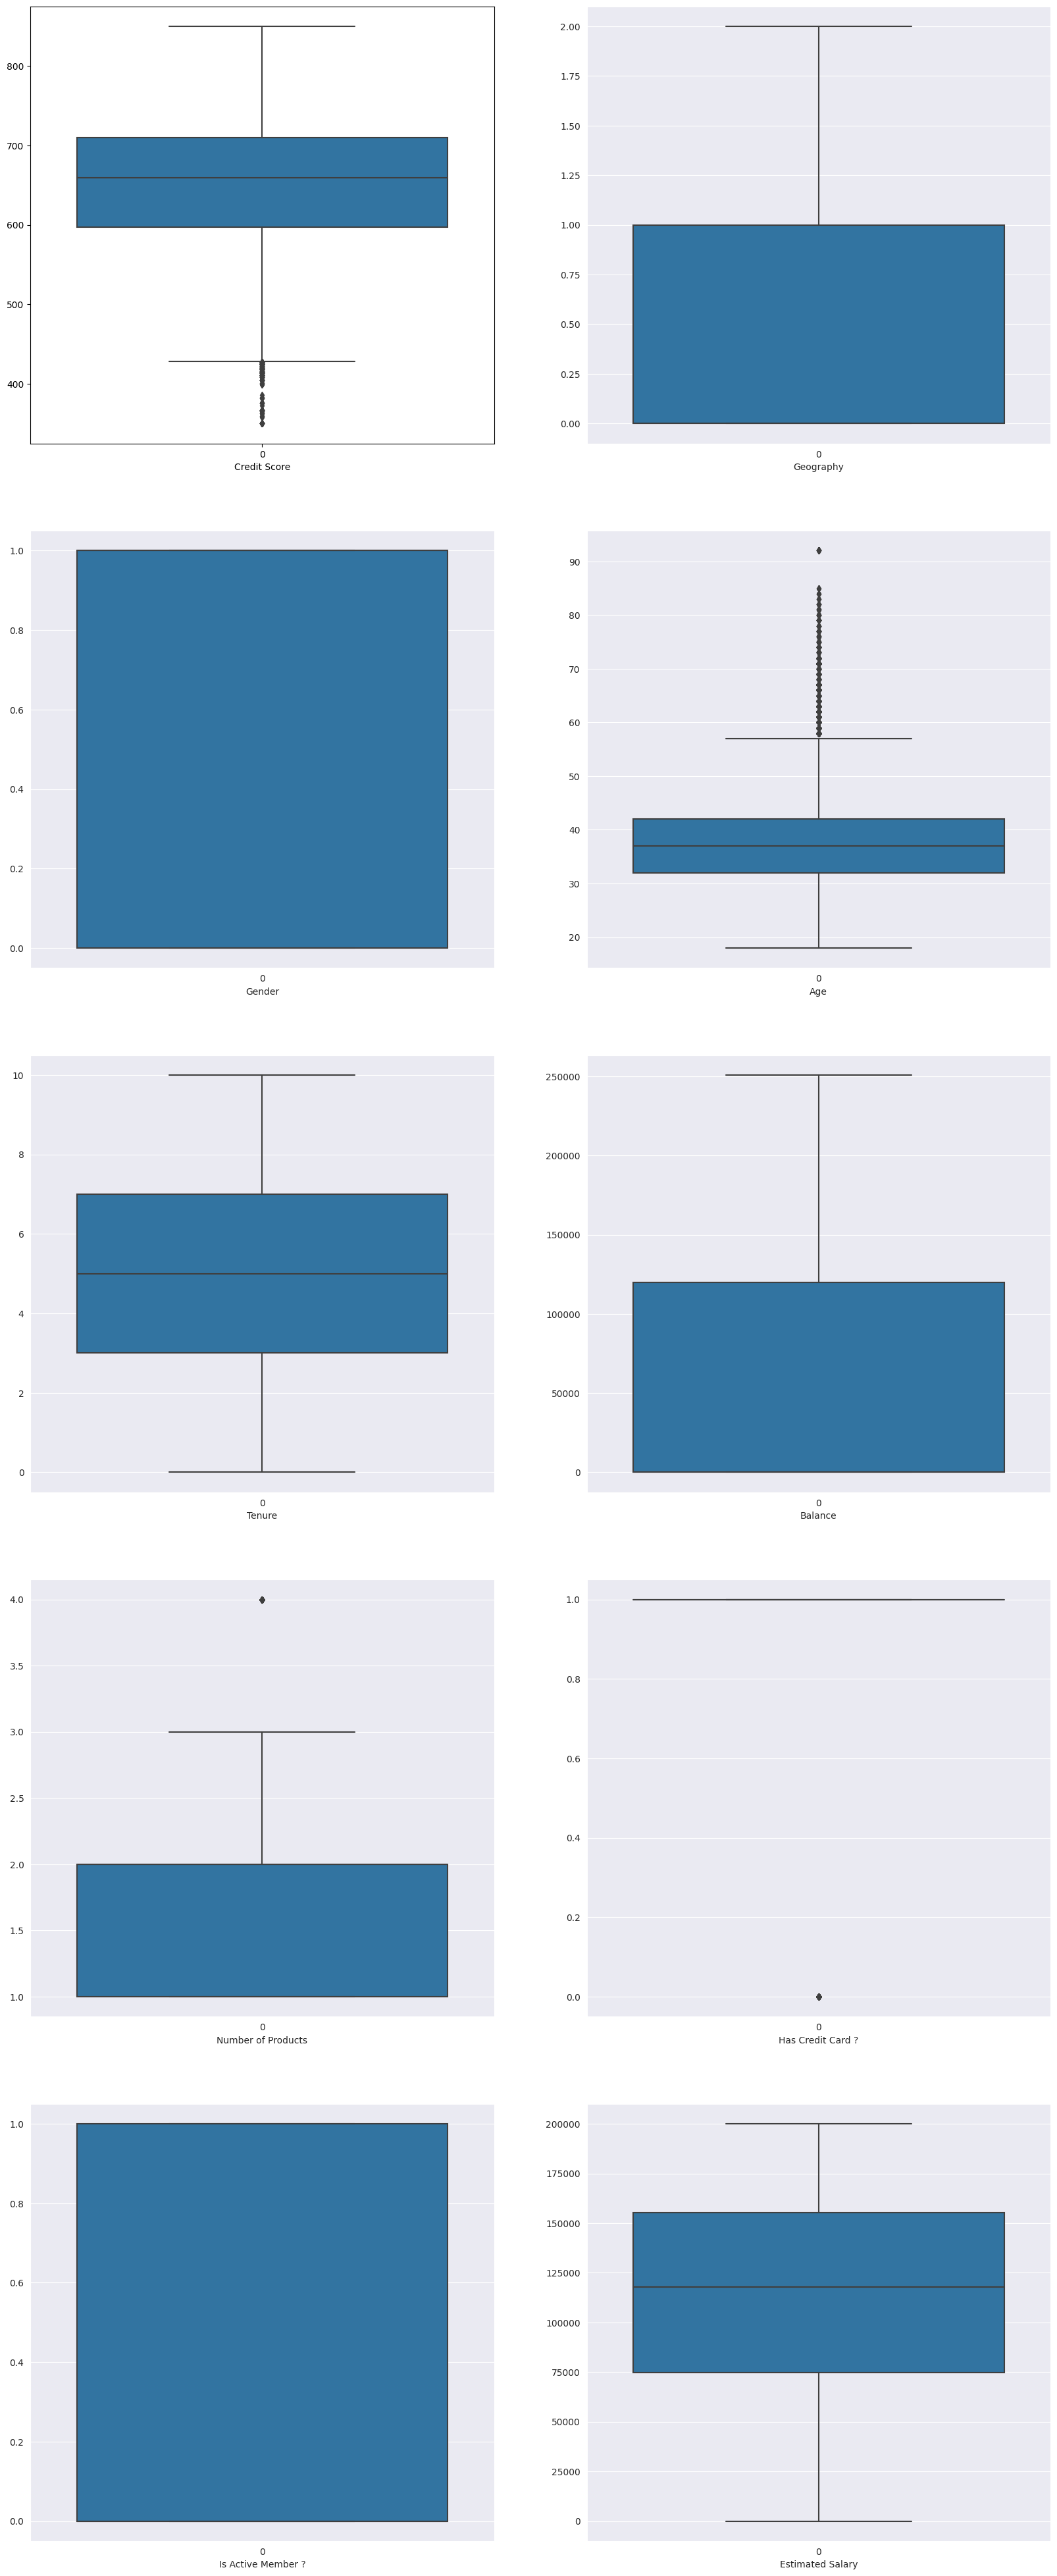

In [19]:
plt.figure(figsize=(20,50))
plt.subplot(5, 2, 1)
sns.set_style('darkgrid')
sns.boxplot(data = X['CreditScore']).set(xlabel='Credit Score')

plt.subplot(5, 2, 2)
sns.set_style('darkgrid')
sns.boxplot(data = X['Geography']).set(xlabel='Geography')

plt.subplot(5, 2, 3)
sns.set_style('darkgrid')
sns.boxplot(data = X['Gender']).set(xlabel='Gender')

plt.subplot(5, 2, 4)
sns.set_style('darkgrid')
sns.boxplot(data = X['Age']).set(xlabel='Age')

plt.subplot(5, 2, 5)
sns.set_style('darkgrid')
sns.boxplot(data = X['Tenure']).set(xlabel='Tenure')

plt.subplot(5, 2, 6)
sns.set_style('darkgrid')
sns.boxplot(data = X['Balance']).set(xlabel='Balance')

plt.subplot(5, 2, 7)
sns.set_style('darkgrid')
sns.boxplot(data = X['NumOfProducts']).set(xlabel='Number of Products')

plt.subplot(5, 2,8)
sns.set_style('darkgrid')
sns.boxplot(data = X['HasCrCard']).set(xlabel='Has Credit Card ?')

plt.subplot(5, 2, 9)
sns.set_style('darkgrid')
sns.boxplot(data = X['IsActiveMember']).set(xlabel='Is Active Member ?')

plt.subplot(5, 2, 10)
sns.set_style('darkgrid')
sns.boxplot(data = X['EstimatedSalary']).set(xlabel='Estimated Salary')


Text(0.5, 0, 'Estimated Salary')

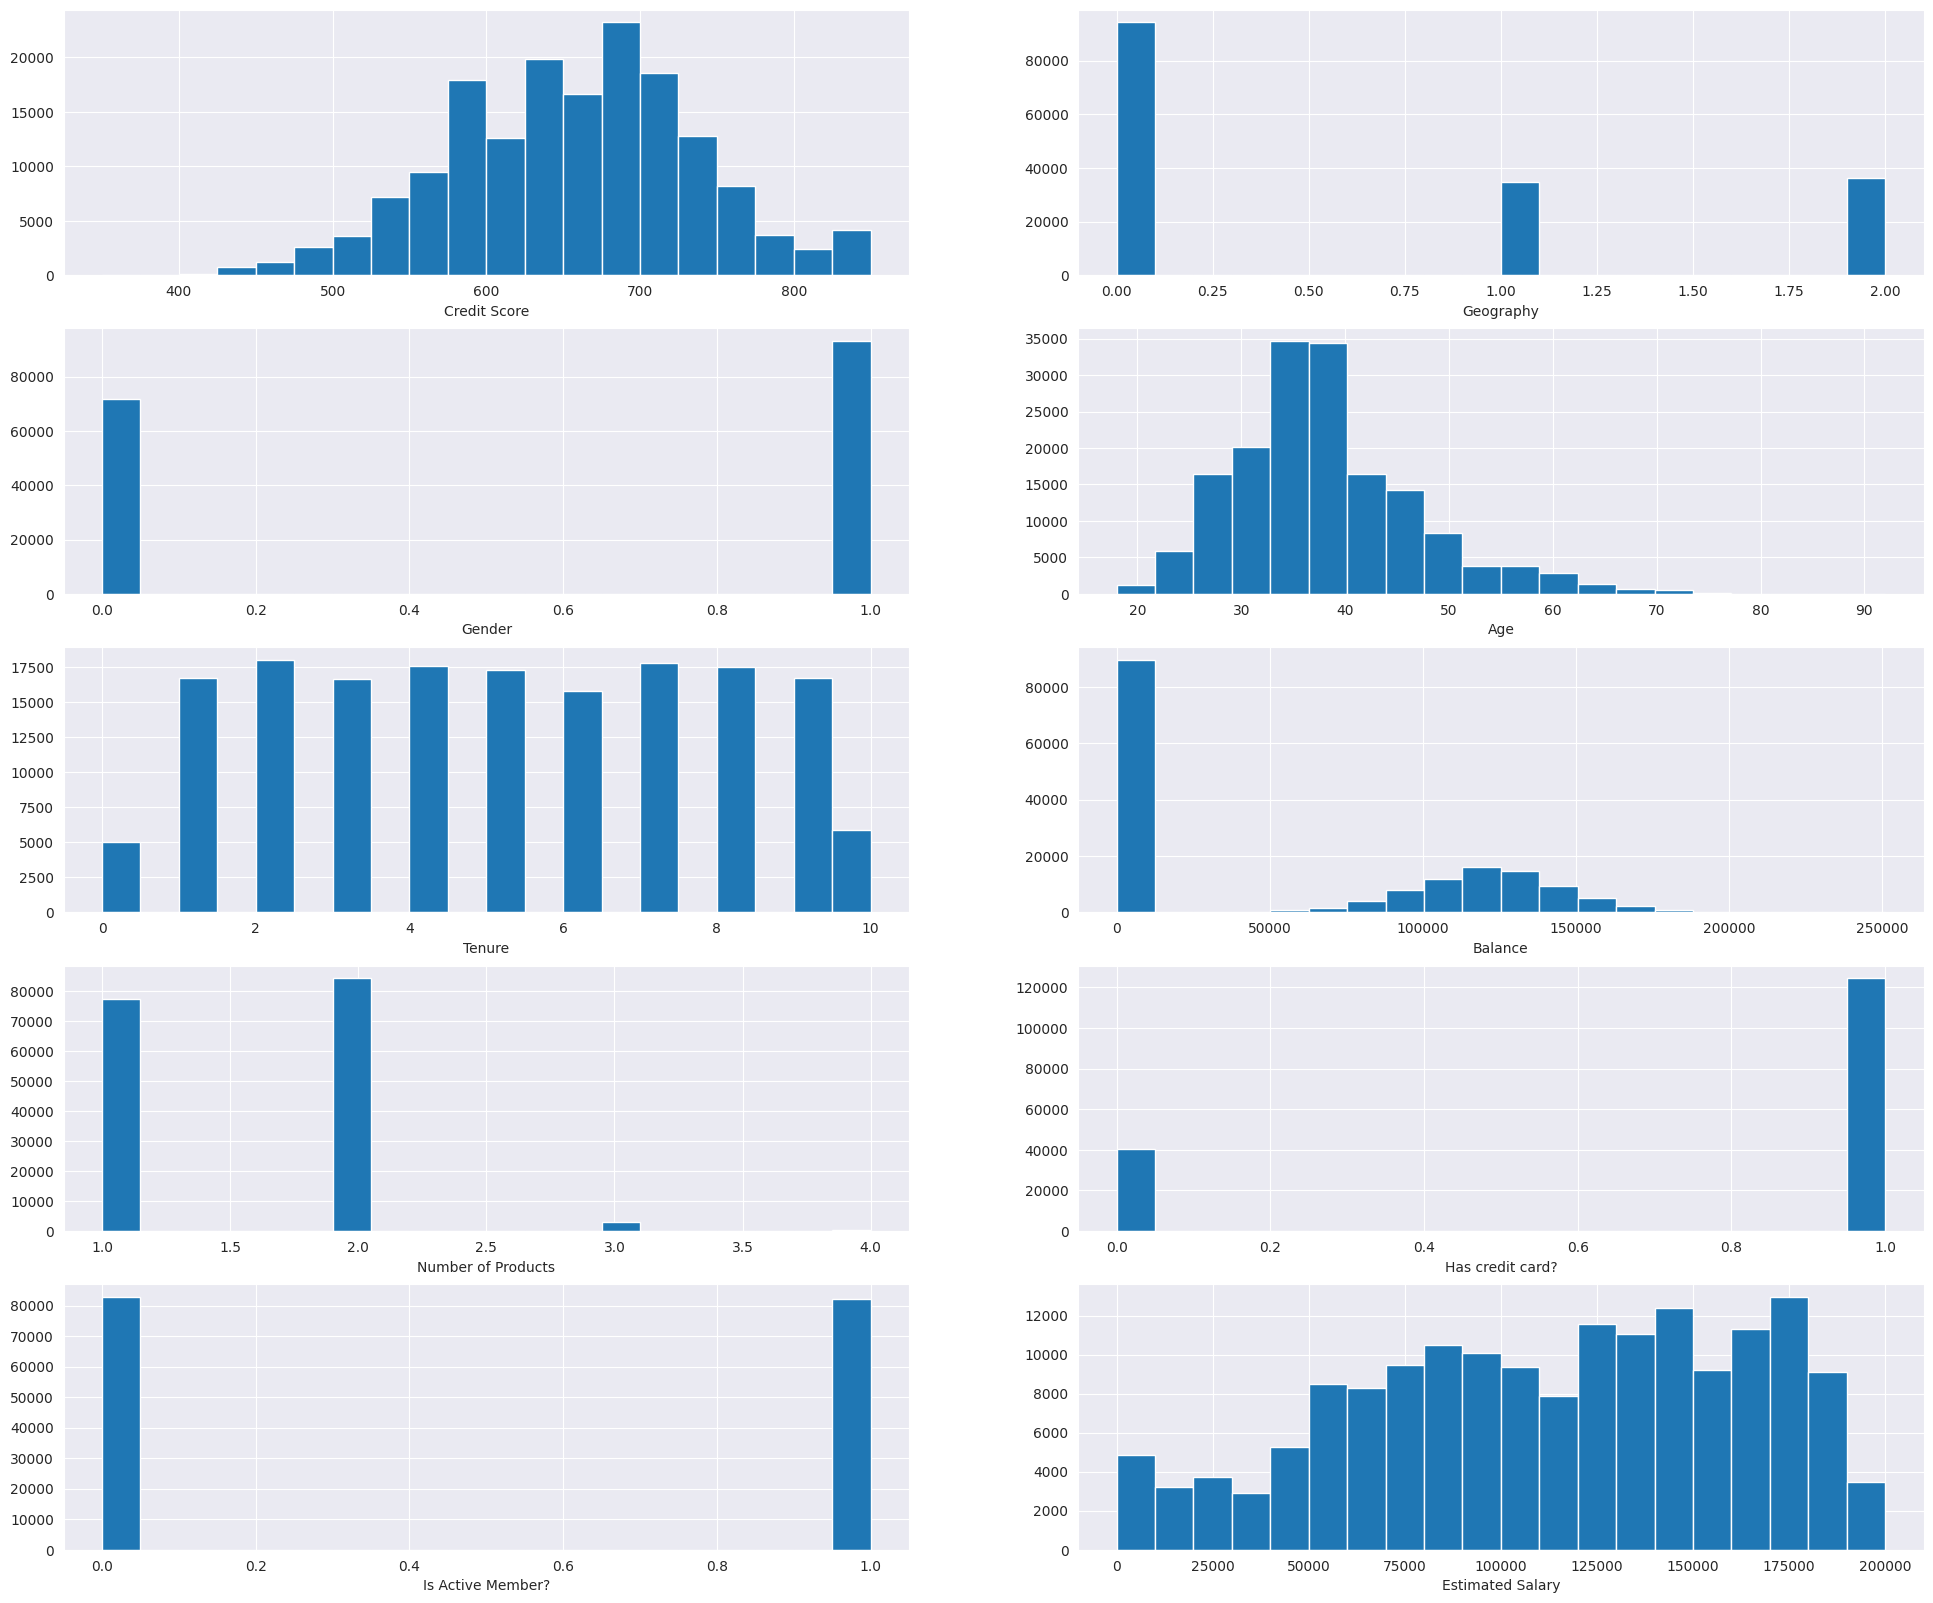

In [20]:
plt.figure(figsize=(24,20))


plt.subplot(5, 2, 1)
fig = X['CreditScore'].hist(bins=20)
fig.set_xlabel('Credit Score')

plt.subplot(5, 2, 2)
fig = X['Geography'].hist(bins=20)
fig.set_xlabel('Geography')

plt.subplot(5, 2, 3)
fig = X['Gender'].hist(bins=20)
fig.set_xlabel('Gender')

plt.subplot(5, 2, 4)
fig = X['Age'].hist(bins=20)
fig.set_xlabel('Age')

plt.subplot(5, 2, 5)
fig = X['Tenure'].hist(bins=20)
fig.set_xlabel('Tenure')

plt.subplot(5, 2, 6)
fig = X['Balance'].hist(bins=20)
fig.set_xlabel('Balance')

plt.subplot(5, 2, 7)
fig = X['NumOfProducts'].hist(bins=20)
fig.set_xlabel('Number of Products')

plt.subplot(5, 2, 8)
fig = X['HasCrCard'].hist(bins=20)
fig.set_xlabel('Has credit card?')

plt.subplot(5, 2, 9)
fig = X['IsActiveMember'].hist(bins=20)
fig.set_xlabel('Is Active Member?')

plt.subplot(5, 2, 10)
fig = X['EstimatedSalary'].hist(bins=20)
fig.set_xlabel('Estimated Salary')


Upon observing the Distribution of the features, Age and Credit Score distributions are skewed with outliers

### Checking Correlations between features and target perhaps?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

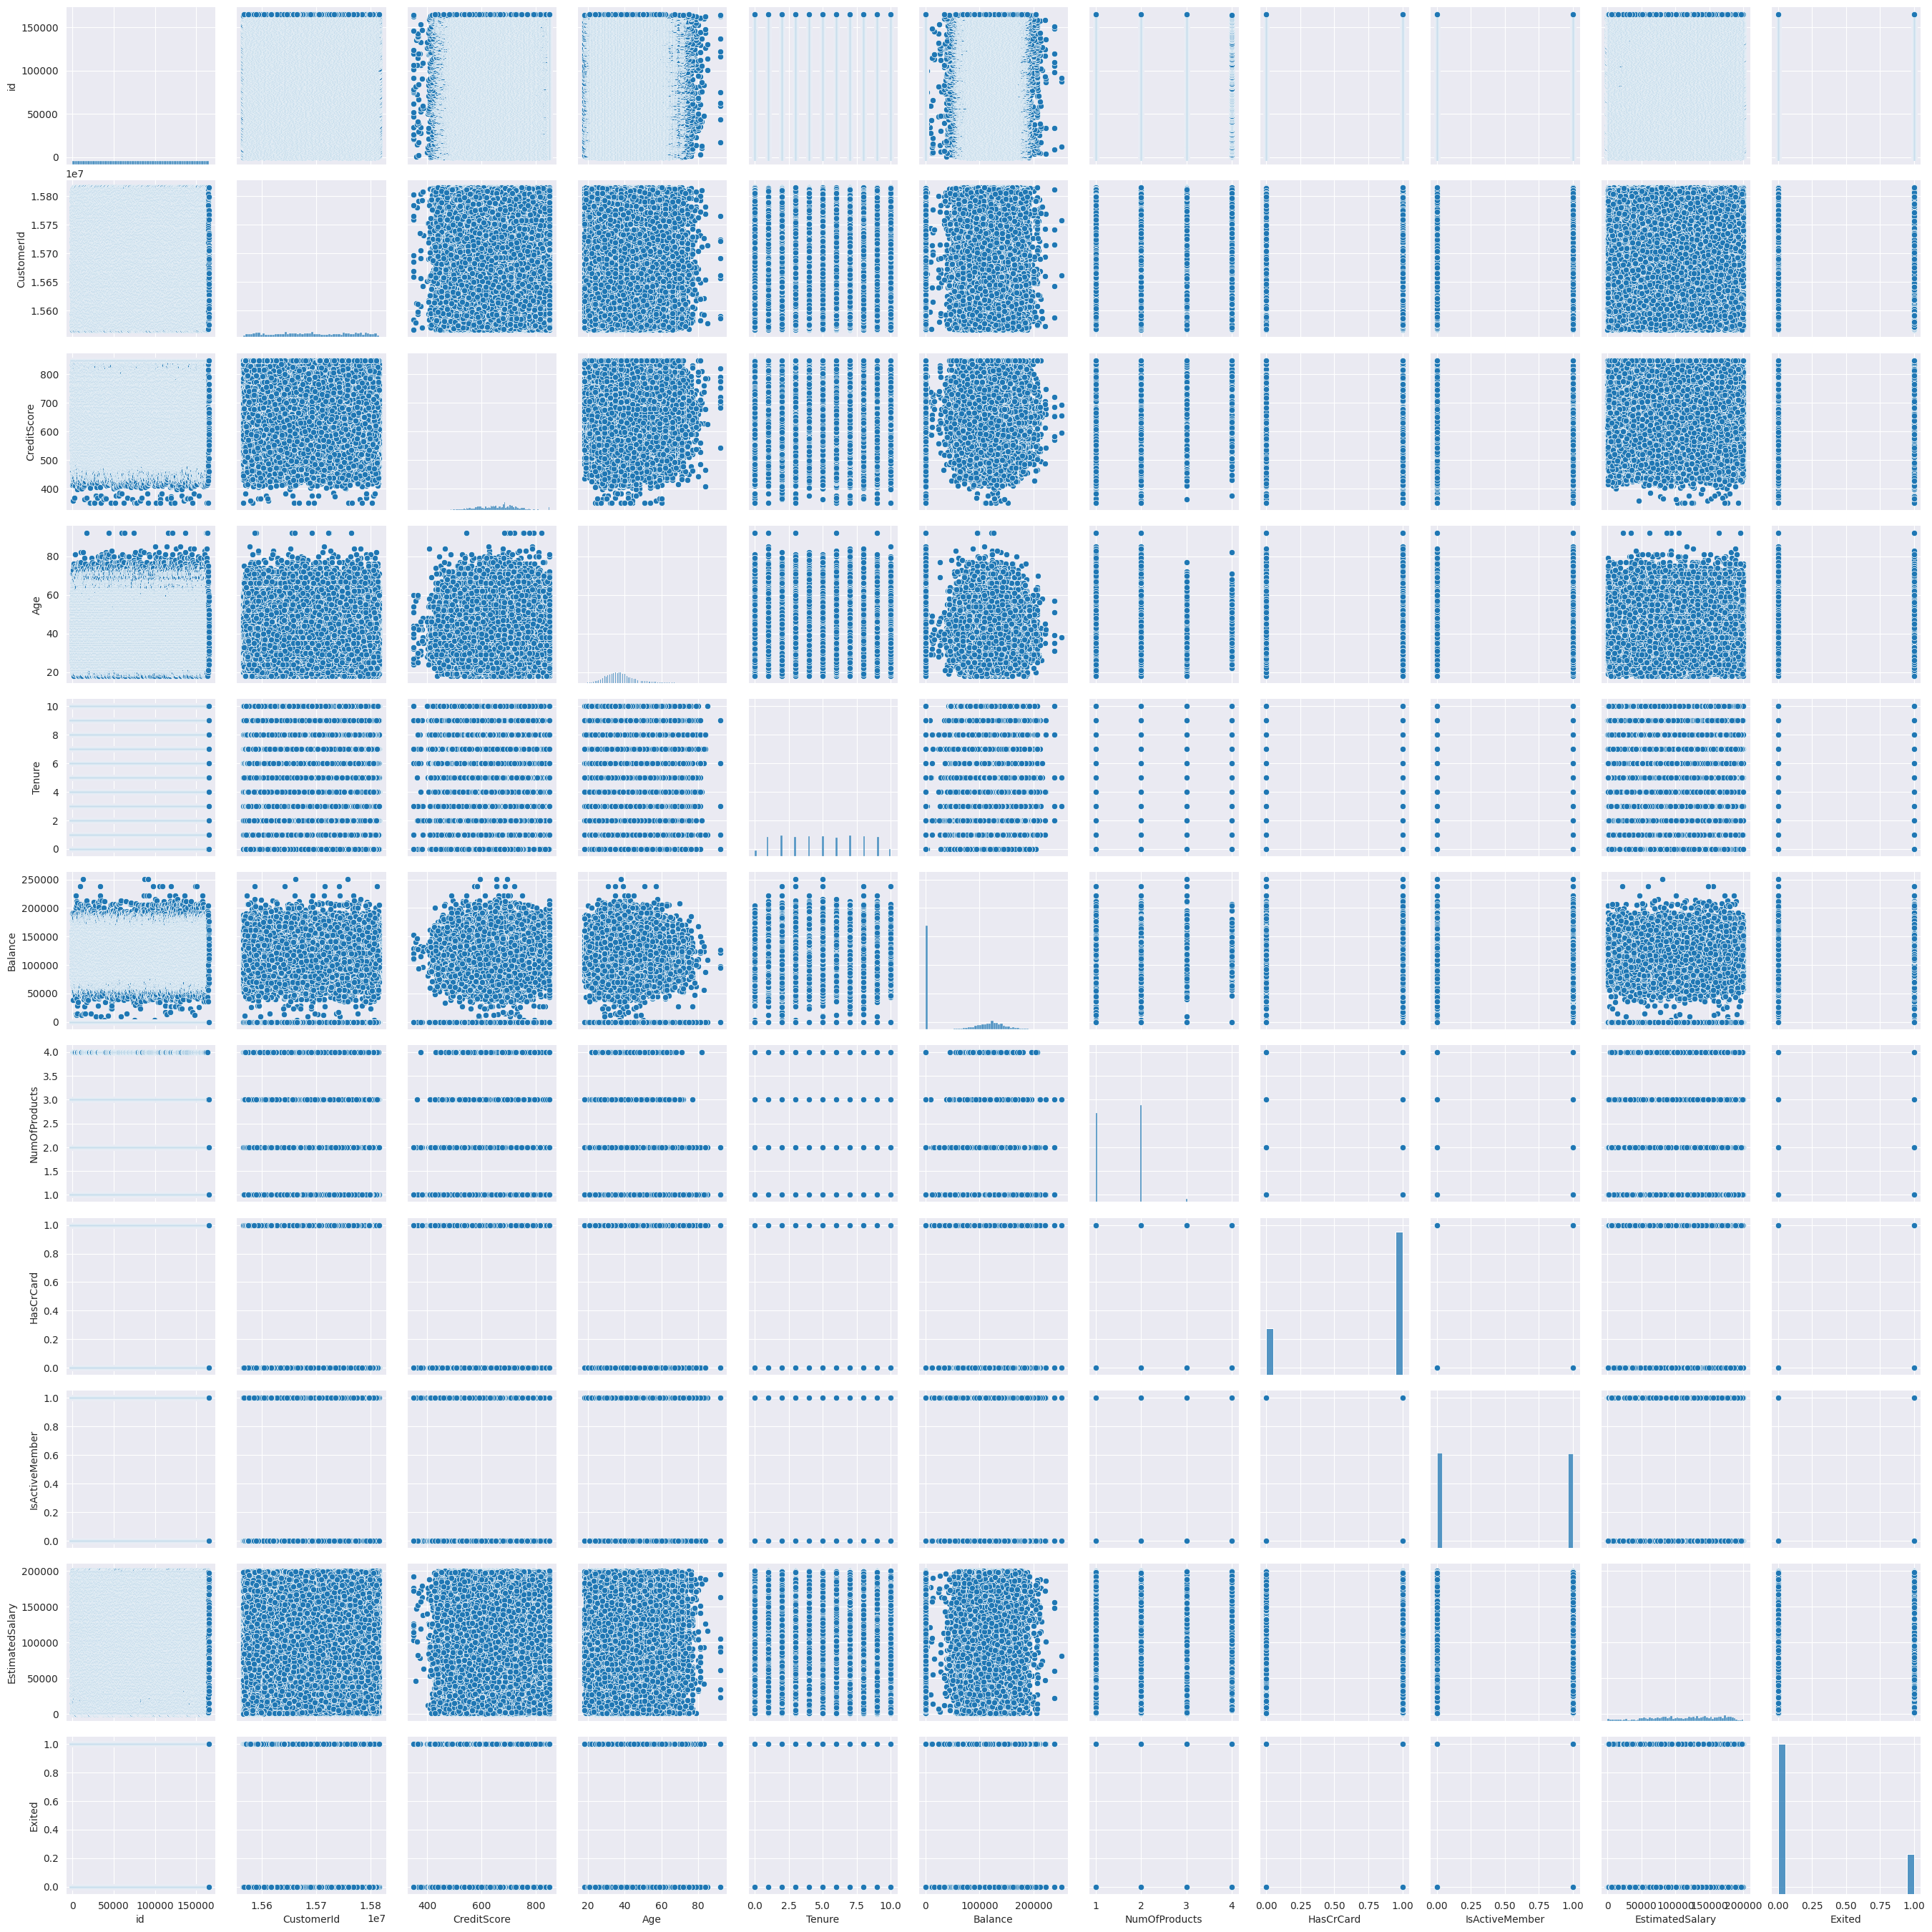

In [21]:
sns.pairplot(df)
plt.show()

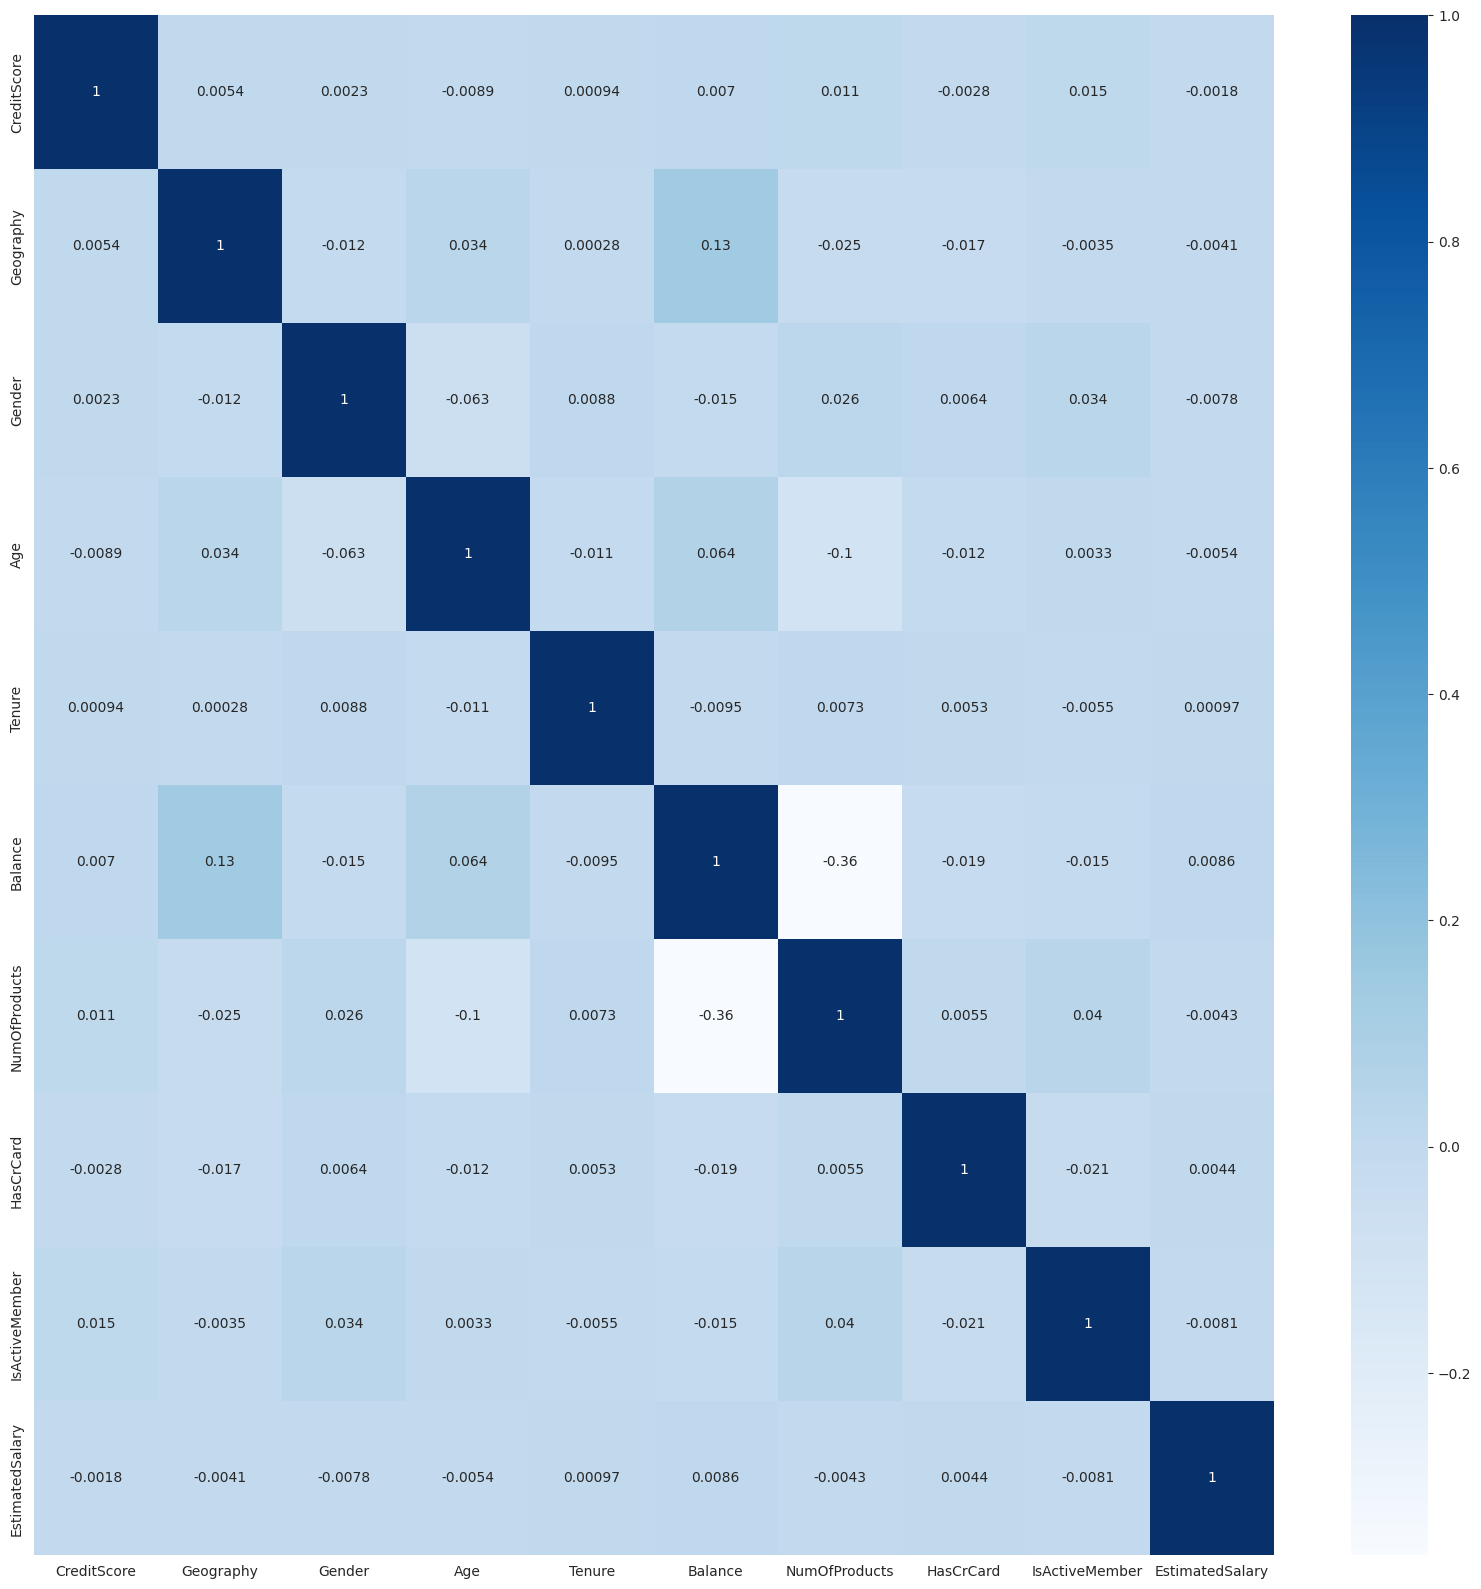

In [22]:
corr = X.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

The values indicate of the heatmap indicate that there is no strong correlation (may it be positive or negative) between any single feature and df['Excited']

## Machine Learning Approaches : 

1. Logistic Regression
2. SVM
3. Naive Bayes
4. K Nearest Neighbour
5. Random Forest ?

### 1. Logistic Regression 

* Undersampled data : AUC Score = 0.7437074985279536
* Oversampled SMOTE data : AUC Score = 0.7488286727270739

#### Undersampled data

In [23]:
#X_undersampled , y_undersampled
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split (X_undersampled , y_undersampled,
                                                    test_size = 0.2,
                                                     random_state = 42)

lr1 = LogisticRegression()
lr1.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled_lr = lr1.predict(X_test_undersampled)

Lets see how good the model is doing : 

**1.Accuracy :**
Accuracy is a straightforward metric that measures the overall correctness of a model's predictions. It's calculated as the ratio of the number of correct predictions to the total number of predictions made.

**2.Precision :**
Precision focuses on the relevancy of the model's predictions within a specific class. It calculates the ratio of correctly predicted positive observations to the total predicted positive observations, indicating how many of the predicted positive cases were actually positive

**3.Recall (Sensitivity):**
Recall, also known as sensitivity, measures the completeness of the model's predictions for a particular class. It calculates the ratio of correctly predicted positive observations to the total actual positive observations, indicating how many of the actual positive cases were captured by the model.


**ROC - AUC curve:**
The ROC-AUC curve, which stands for Receiver Operating Characteristic - Area Under the Curve, is a graphical representation used to evaluate the performance of a classification model.

Receiver Operating Characteristic (ROC) Curve:

* The ROC curve is a plot that illustrates the performance of a binary classifier at various thresholds. It displays the relationship between the true positive rate (TPR) and the false positive rate (FPR) as the discrimination threshold changes.
* TPR (Sensitivity or Recall): This is the proportion of actual positive cases that are correctly identified by the model.
* FPR (1 - Specificity): This is the proportion of actual negative cases that are incorrectly classified as positive by the model.

Area Under the ROC Curve (AUC):

* AUC represents the area under the ROC curve. It quantifies the model's ability to distinguish between classes.
* A higher AUC score (closer to 1) suggests that the model has better discrimination capability, meaning it can differentiate between positive and negative cases more effectively across various thresholds.
* An AUC of 0.5 indicates that the model performs no better than random guessing, while an AUC of 1 signifies perfect classification.
    


In [24]:
precision_undersampled_lr = precision_score(y_test_undersampled, y_pred_undersampled_lr)
recall_undersampled_lr = recall_score(y_test_undersampled, y_pred_undersampled_lr)
accuracy_undersampled_lr = accuracy_score(y_test_undersampled, y_pred_undersampled_lr)
print(f"Precision : {precision_undersampled_lr}")
print(f"Recall : {recall_undersampled_lr}")
print(f"Accuracy : {accuracy_undersampled_lr}")

Precision : 0.6926064441887226
Recall : 0.6865820618850705
Accuracy : 0.6896699835349703


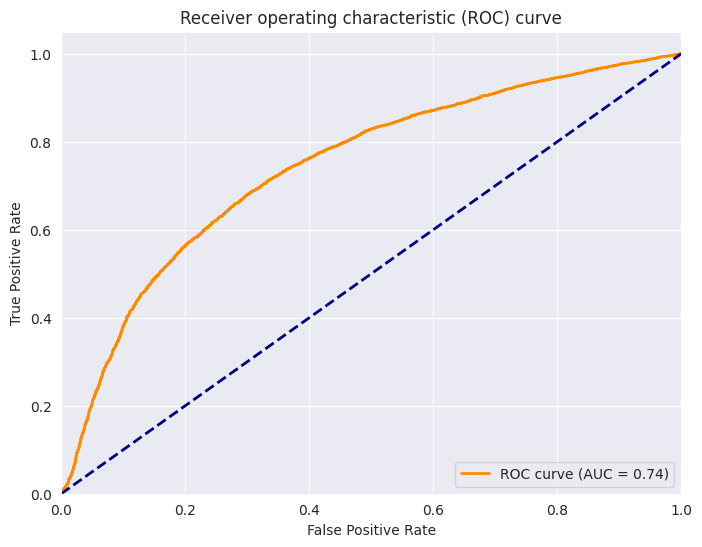

AUC score: 0.7437074985279536


In [25]:
y_pred_prob_undersampled = lr1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc)

#### Oversampled SMOTE data

In [26]:
#X_SMOTE, y_SMOTE
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split (X_SMOTE , y_SMOTE,
                                                    test_size = 0.2,
                                                     random_state = 42)

lr2 = LogisticRegression()
lr2.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE_lr = lr2.predict(X_test_SMOTE)

In [27]:
precision_SMOTE_lr = precision_score(y_test_SMOTE, y_pred_SMOTE_lr)
recall_SMOTE_lr = recall_score(y_test_SMOTE, y_pred_SMOTE_lr)
accuracy_SMOTE_lr = accuracy_score(y_test_SMOTE, y_pred_SMOTE_lr)
print(f"Precision : {precision_SMOTE_lr}")
print(f"Recall : {recall_SMOTE_lr}")
print(f"Accuracy : {accuracy_SMOTE_lr}")

Precision : 0.6925313396767859
Recall : 0.7043935786158692
Accuracy : 0.6956538446758637


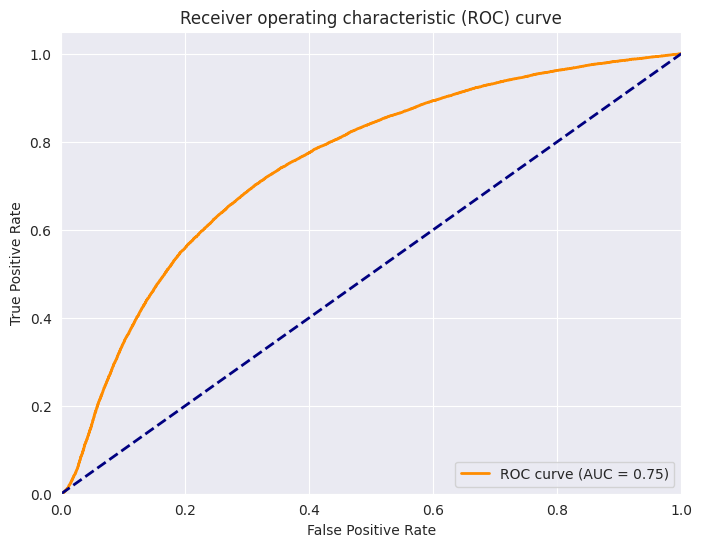

AUC score: 0.7488286727270739


In [28]:
y_pred_prob_SMOTE = lr1.predict_proba(X_test_SMOTE)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_pred_prob_SMOTE)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print('AUC score:', roc_auc)

#### Conclusion

In essence, an AUC score of 0.749 suggests that the logistic regression model has predictive capability better than random chance but might not be exceptionally accurate. 

### SVM

Since our dataset is very large, directly using SVM is costly and we all are impatient af. So, we can consider ensemble method : Bagging (Bootstrap Aggregating) technique that combines multiple models trained on different subsets of the data by creating several subsets of the training data (bootstrap samples), train separate SVM models on each subset, and then combine their predictions (through voting) to make the final prediction.
 
Okay: learning things the hard way
SVM from sklearn is WAYYYY too slow, even when I tried to keep 10,000 estimators (meaning 55 samples per estimator), it was taking HOURS, 

I got this from the sklearn page 😱
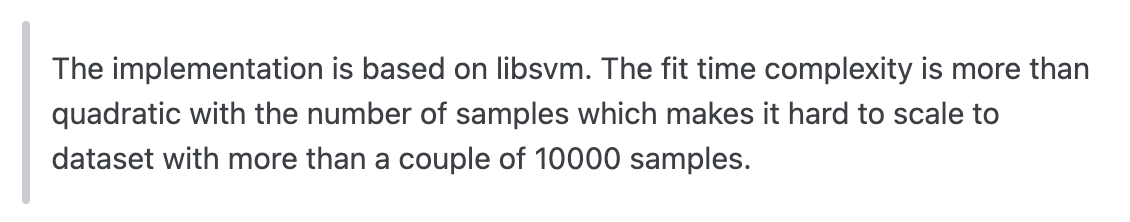


But I ain't giving up on SVM!!
Upon looking up further on the internet I found something really awesome, so I have tried it out 

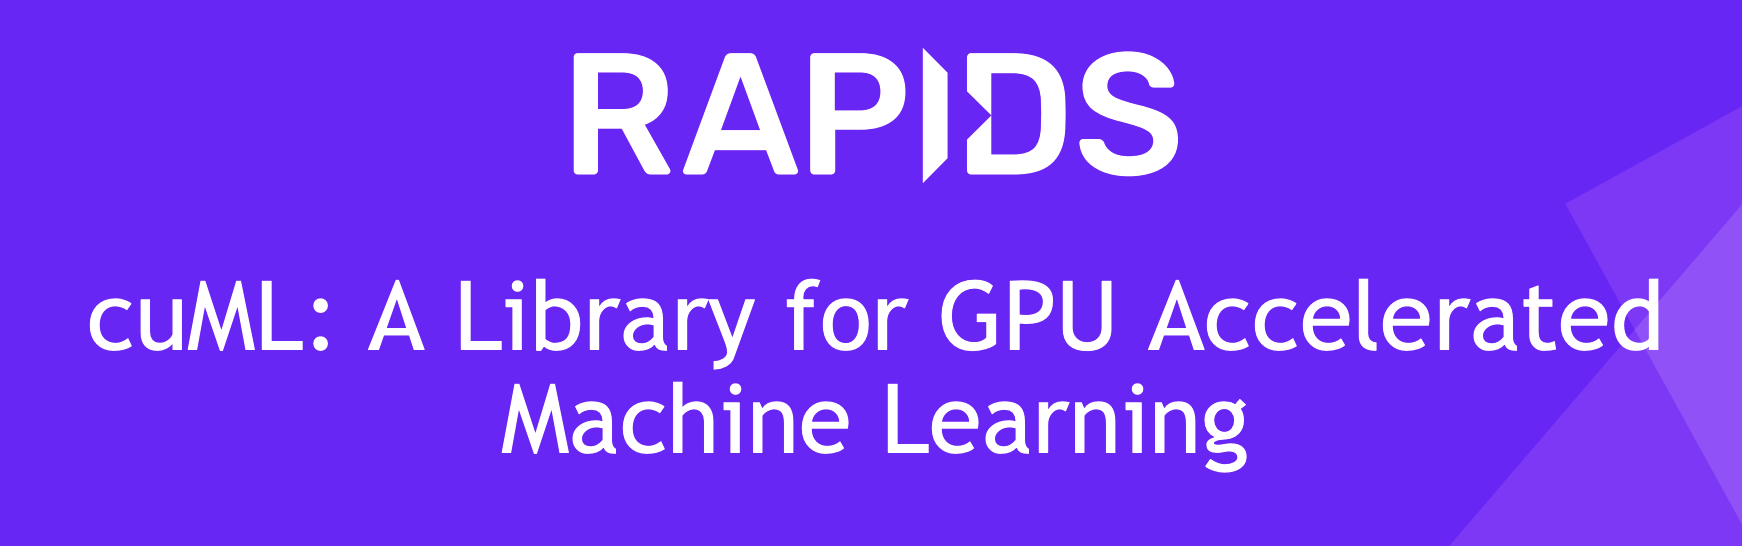




**Support Vector Machines (SVM)** are a type of supervised learning algorithm used for classification and regression tasks. They work by finding the optimal hyperplane that separates data points into different classes or, in the case of regression, predicts the value based on input features. The choice of kernel in SVM determines how the algorithm separates data points in a higher-dimensional space. 

* **SVM with Default Hyperparameters:**
This refers to an SVM model where the hyperparameters are set to default values. The kernel might default to the radial basis function (RBF) or Gaussian kernel, which is a common choice when the data doesn’t naturally fit a linear separation.

Uses: It’s a good starting point for SVM classification problems where you're unsure about the best kernel or parameter values. It can handle both linearly separable and non-linearly separable data but might not optimize performance for specific cases.

* **SVM with Linear Kernel:**
The linear kernel is a simple kernel function that assumes the data is linearly separable. It constructs a decision boundary as a straight line in a lower-dimensional space.

Uses: It's effective when the data can be separated by a straight line or hyperplane. This kernel is efficient for high-dimensional data and works well when the number of features is larger than the number of samples.

* **SVM with Polynomial Kernel:**
The polynomial kernel computes the decision boundary based on polynomial functions of the original features. It maps the data to a higher-dimensional space to find a nonlinear decision boundary.

Uses: It's suitable for cases where the data might be separable by curved or non-linear boundaries. However, the choice of the polynomial degree can significantly impact the model's performance and may require careful tuning.

* **SVM with Sigmoid Kernel:**
The sigmoid kernel is based on the sigmoid function and is capable of handling non-linear decision boundaries.

Uses: It's less commonly used compared to other kernels like linear, polynomial, or RBF. It can be useful in specific cases, but generally, it's not the first choice due to the RBF's versatility in handling non-linearities.

#### Undersampled data

##### SVM with default hyperparams


In [29]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split (X_undersampled , y_undersampled,
                                                    test_size = 0.2,
                                                     random_state = 42)

X_train_undersampled.shape

(55873, 10)

In [30]:
##trying out the SVM with default hyperparameters
#clf1 = cuml


'''
The slow slugs:
##################################### Implementation 2 #############################################
svc1 = SVC(probability=True, random_state=42)

clf1 = BaggingClassifier(estimator = svc1, n_estimators=10000, bootstrap = False, random_state=42)

clf1.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_dh = clf1.predict(X_test_undersampled)


##################################### Implementation 1 #############################################
svc1 = SVC(probability=True)


svc1.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_dh = svc1.predict(X_test_undersampled)
'''

'\nThe slow slugs:\n##################################### Implementation 2 #############################################\nsvc1 = SVC(probability=True, random_state=42)\n\nclf1 = BaggingClassifier(estimator = svc1, n_estimators=10000, bootstrap = False, random_state=42)\n\nclf1.fit(X_train_undersampled, y_train_undersampled)\n\ny_pred_svm_dh = clf1.predict(X_test_undersampled)\n\n\n##################################### Implementation 1 #############################################\nsvc1 = SVC(probability=True)\n\n\nsvc1.fit(X_train_undersampled, y_train_undersampled)\n\ny_pred_svm_dh = svc1.predict(X_test_undersampled)\n'

In [31]:
'''
y_pred_prob_undersampled_svm1 = svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm1)
roc_auc1 = auc(fpr, tpr)
print('AUC score:', roc_auc1)
'''


"\ny_pred_prob_undersampled_svm1 = svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class\nfpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm1)\nroc_auc1 = auc(fpr, tpr)\nprint('AUC score:', roc_auc1)\n"

##### SVM with linear kernel



In [32]:
'''
linear_svc1 = SVC(kernel='linear', C=1.0, probability = True)

linear_svc1.fit(X_train_undersampled, y_train_undersampled)

y_pred_svm_linear = linear_svc1.predict(X_test_undersampled)
'''

"\nlinear_svc1 = SVC(kernel='linear', C=1.0, probability = True)\n\nlinear_svc1.fit(X_train_undersampled, y_train_undersampled)\n\ny_pred_svm_linear = linear_svc1.predict(X_test_undersampled)\n"

In [33]:
'''
y_pred_prob_undersampled_svm2 = linear_svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm2)
roc_auc2 = auc(fpr, tpr)
print('AUC score:', roc_auc2)

'''

"\ny_pred_prob_undersampled_svm2 = linear_svc1.predict_proba(X_test_undersampled)[:, 1]  # Probability estimates of the positive class\nfpr, tpr, thresholds = roc_curve(y_test_undersampled, y_pred_prob_undersampled_svm2)\nroc_auc2 = auc(fpr, tpr)\nprint('AUC score:', roc_auc2)\n\n"